## WaveNet Neural Network for EEG Data Classification


In [1]:
# Importing necessities 
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Add, Activation, Multiply
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import csv
import shutil
import pathlib 
import copy
import random
import itertools


import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.signal as signal
import scipy.stats as stats
import scipy.io as sio
import matplotlib.pyplot as plt


from random import sample as sm

import glob
import os
import mat73

import os
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

import os
import numpy as np
from scipy.io import loadmat

import tqdm
from tqdm import tqdm
import time

import os
import time
import numpy as np
import h5py
import tensorflow as tf
import json

import pickle


## Process each file and save data to HDF5 #### GOOD VERSION 16/06/2024!!!


In [2]:
dataset_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project'
output_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project\DATASET_ABSOLUTE_TEST_NO_JOINED\Output'
start_time = time.time()

# Define the directory containing your dataset
#dir = os.path.join(dataset_dir, 'DatasetFnusa\\DatasetFnusa')
#dir = os.path.join(dataset_dir, 'DatasetMayo\\DatasetMayo')
#dir = os.path.join(dataset_dir, 'DataSetTest') # Used to test pipeline 
#dir = os.path.join(dataset_dir, 'Dataset_Joined') #ataset Fnusa and Mayo together. Easier to get through the pipeline
#dir = os.path.join(dataset_dir, 'NEWTEST') # Used to double check wavenetmodel after first test
dir = os.path.join(dataset_dir, 'DATASET_ABSOLUTE_TEST_NO_JOINED') #ABSOLUTELY DISJOINED FROM joined LOL I WANT TO BE SURE THE MODEL IS ACCURATE and there is absolutely no no no data leakage lol

# Define the output HDF5 file in order to minimize memory usage
output_file = os.path.join(output_dir, 'dataset.h5')

import h5py
import numpy as np
import os

# Create an HDF5 file to store the data
def process_file(file, label, hdf5_file, dir):
    if file.endswith('.mat'):
        data_path = os.path.join(dir, str(label), file)
        try:
            mat_file = mat73.loadmat(data_path)
            data = mat_file['data'].T
        except:
            mat_file = sio.loadmat(data_path)
            data = mat_file['data'].flatten()
        hdf5_file.create_dataset(f'label_{label}/file_{file}', data=data)

def create_hdf5(dataset_dir, output_file):
    with h5py.File(output_file, 'w') as hdf5_file:
        for label in range(4):
            data_path = os.path.join(dataset_dir, str(label))
            list(map(lambda file: process_file(file, label, hdf5_file, dataset_dir), os.listdir(data_path)))

create_hdf5(dir, output_file)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")


Elapsed time: 1.6418299674987793 seconds


## Split and save HDF5 data

In [3]:
#dataset_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project'
#output_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project\Dataset_Joined\Output'
start_time = time.time()

# Define the directory containing your dataset
#dir = os.path.join(dataset_dir, 'DatasetFnusa\\DatasetFnusa')
#dir = os.path.join(dataset_dir, 'DatasetMayo\\DatasetMayo')
#dir = os.path.join(dataset_dir, 'DataSetTest') # Used to test pipeline 
#dir = os.path.join(dataset_dir, 'Dataset_Joined') #ataset Fnusa and Mayo together. Easier to get through the pipeline
#dir = os.path.join(dataset_dir, 'NEWTEST') # Used to double check wavenetmodel after first test
dir = os.path.join(dataset_dir, 'DATASET_ABSOLUTE_TEST_NO_JOINED') #ABSOLUTELY DISJOINED FROM joined LOL I WANT TO BE SURE THE MODEL IS ACCURATE and there is absolutely no no no data leakage lol

# Define the output HDF5 file in order to minimize memory usage
output_file = os.path.join(output_dir, 'dataset.h5')


def save_to_hdf5(output_dir, file_name, label_group, file_names):
    with h5py.File(os.path.join(output_dir, file_name), 'w') as hdf5_file:
        group = hdf5_file.create_group('label')
        [group.create_dataset(file_name, data=label_group[file_name][:]) for file_name in file_names]

def split_and_save_data(file_path, output_dir, labels, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    with h5py.File(file_path, 'r') as hdf5_file:
        def process_label(label):
            label_group = hdf5_file[f'label_{label}']
            file_names = list(label_group.keys())
            np.random.shuffle(file_names)
            
            num_samples = len(file_names)
            num_train = int(train_ratio * num_samples)
            num_val = int(val_ratio * num_samples)
            num_test = int(test_ratio * num_samples)
            
            train_files = file_names[:num_train]
            val_files = file_names[num_train:num_train + num_val]
            test_files = file_names[num_train + num_val:]
            
            save_to_hdf5(output_dir, f'train_label_{label}.h5', label_group, train_files)
            save_to_hdf5(output_dir, f'val_label_{label}.h5', label_group, val_files)
            save_to_hdf5(output_dir, f'test_label_{label}.h5', label_group, test_files)
        
        list(map(process_label, labels))
            
labels = [0, 1, 2, 3]  # The labels in your dataset
split_and_save_data(output_file, output_dir, labels)



end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 0.20823121070861816 seconds


## Create TF dataset in batches & split it

In [4]:
#dataset_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project'
#output_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project\Dataset_Joined\Output'
#dir = os.path.join(dataset_dir, 'Dataset_Joined')
output_file = os.path.join(output_dir, 'dataset.h5')
start_time = time.time()

# Function to count the number of samples in the HDF5 file
def count_samples(file_path, labels):
    sample_counts = {label: 0 for label in labels}
    with h5py.File(file_path, 'r') as hdf5_file:
        for label in labels:
            label_group = hdf5_file[f'label_{label}']
            sample_counts[label] = len(label_group.keys())
    return sample_counts

# Generator function to read data from HDF5 file in batches
def hdf5_generator(file_path, batch_size):
    with h5py.File(file_path, 'r') as hdf5_file:
        label_group = hdf5_file['label']
        file_names = list(label_group.keys())
        np.random.shuffle(file_names)
        for start_idx in range(0, len(file_names), batch_size):
            batch_data = []
            batch_labels = []
            end_idx = min(start_idx + batch_size, len(file_names))
            for i in range(start_idx, end_idx):
                file_name = file_names[i]
                data = label_group[file_name][:]
                batch_data.append(data)
                batch_labels.append(int(file_path.split('_')[-1].split('.')[0]))  # Extract label from filename
            batch_data = np.array(batch_data)
            batch_labels = np.array(batch_labels)
            yield batch_data.reshape((batch_data.shape[0], 1, 15000)), batch_labels.reshape((batch_labels.shape[0], 1))

# Function to create TensorFlow dataset from generator
def create_tf_dataset_from_generator(file_paths, batch_size):
    datasets = []
    for file_path in file_paths:
        dataset = tf.data.Dataset.from_generator(
            lambda: hdf5_generator(file_path, batch_size),
            output_signature=(
                tf.TensorSpec(shape=(None, 1, 15000), dtype=tf.float64),
                tf.TensorSpec(shape=(None, 1), dtype=tf.int64)
            )
        )
        datasets.append(dataset)
    combined_dataset = tf.data.Dataset.sample_from_datasets(datasets, weights=[1/len(datasets)]*len(datasets))
    return combined_dataset.repeat()  # Ensure the dataset can generate enough batches

# Define file path and labels
labels = [0, 1, 2, 3]  # The labels in your dataset

# Count the number of samples for each label
output_file = os.path.join(output_dir, 'dataset.h5')
sample_counts = count_samples(output_file, labels)
total_samples = sum(sample_counts.values())

# Determine a reasonable batch size based on the total number of samples
max_batch_size = 128  # Adjust as necessary
min_batch_size = 32   # Adjust as necessary
batch_size = max(min(total_samples // 10, max_batch_size), min_batch_size)

# Create TensorFlow datasets
train_files = [os.path.join(output_dir, f'train_label_{label}.h5') for label in labels]
val_files = [os.path.join(output_dir, f'val_label_{label}.h5') for label in labels]
test_files = [os.path.join(output_dir, f'test_label_{label}.h5') for label in labels]

train_dataset = create_tf_dataset_from_generator(train_files, batch_size)
val_dataset = create_tf_dataset_from_generator(val_files, batch_size)
test_dataset = create_tf_dataset_from_generator(test_files, batch_size)

# Verify the splits by checking the first batch
for data_batch, label_batch in train_dataset.take(1):
    print(f"Training data batch shape: {data_batch.shape}")
    print(f"Training labels batch shape: {label_batch.shape}")
for data_batch, label_batch in val_dataset.take(1):
    print(f"Validation data batch shape: {data_batch.shape}")
    print(f"Validation labels batch shape: {label_batch.shape}")
for data_batch, label_batch in test_dataset.take(1):
    print(f"Test data batch shape: {data_batch.shape}")
    print(f"Test labels batch shape: {label_batch.shape}")

# Print sample count and total samples
print("Sample count:", sample_counts)
print("Total samples:", total_samples)

# Print elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")


Training data batch shape: (32, 1, 15000)
Training labels batch shape: (32, 1)
Validation data batch shape: (8, 1, 15000)
Validation labels batch shape: (8, 1)
Test data batch shape: (9, 1, 15000)
Test labels batch shape: (9, 1)
Sample count: {0: 24, 1: 36, 2: 45, 3: 81}
Total samples: 186
Elapsed time: 0.7503378391265869 seconds


## Verify the splits by checking the first batch

In [5]:
# Function to get all file names from the HDF5 file for a specific label
def get_filenames(file_path):
    filenames = set()
    with h5py.File(file_path, 'r') as hdf5_file:
        label_group = hdf5_file['label']
        filenames.update(label_group.keys())
    return filenames

# Function to check for overlap between datasets
def check_for_overlap(train_files, val_files, test_files):
    train_filenames = set()
    val_filenames = set()
    test_filenames = set()

    # Collect filenames from all training files
    for file in train_files:
        train_filenames.update(get_filenames(file))
    
    # Collect filenames from all validation files
    for file in val_files:
        val_filenames.update(get_filenames(file))
    
    # Collect filenames from all test files
    for file in test_files:
        test_filenames.update(get_filenames(file))
    
    # Check for overlaps
    train_val_overlap = train_filenames.intersection(val_filenames)
    train_test_overlap = train_filenames.intersection(test_filenames)
    val_test_overlap = val_filenames.intersection(test_filenames)
    
    print(f"Number of overlapping files between train and val: {len(train_val_overlap)}")
    print(f"Number of overlapping files between train and test: {len(train_test_overlap)}")
    print(f"Number of overlapping files between val and test: {len(val_test_overlap)}")

    return train_val_overlap, train_test_overlap, val_test_overlap

# Define file paths for each dataset
train_files = [os.path.join(output_dir, f'train_label_{label}.h5') for label in labels]
val_files = [os.path.join(output_dir, f'val_label_{label}.h5') for label in labels]
test_files = [os.path.join(output_dir, f'test_label_{label}.h5') for label in labels]

# Check for overlaps
train_val_overlap, train_test_overlap, val_test_overlap = check_for_overlap(train_files, val_files, test_files)

# Output overlap details if any
if train_val_overlap:
    print("Overlap between train and val datasets:")
    for file in train_val_overlap:
        print(file)

if train_test_overlap:
    print("Overlap between train and test datasets:")
    for file in train_test_overlap:
        print(file)

if val_test_overlap:
    print("Overlap between val and test datasets:")
    for file in val_test_overlap:
        print(file)


Number of overlapping files between train and val: 0
Number of overlapping files between train and test: 0
Number of overlapping files between val and test: 0


## Compile, train and save the model

In [6]:
def count_samples_model(file_path):
    total_samples = 0
    with h5py.File(file_path, 'r') as hdf5_file:
        # Access the 'label' group
        label_group = hdf5_file['label']
        total_samples = len(label_group.keys())
    return total_samples

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
# Define the directories containing your train, validation, and test files
dataset_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project'
output_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project\DATASET_ABSOLUTE_TEST_NO_JOINED\Output'
dir = os.path.join(dataset_dir, 'Dataset_Joined')
start_time = time.time()
output_file = os.path.join(output_dir, 'dataset.h5')
train_files = [os.path.join(output_dir, f'train_label_{label}.h5') for label in labels]
val_files = [os.path.join(output_dir, f'val_label_{label}.h5') for label in labels]
test_files = [os.path.join(output_dir, f'test_label_{label}.h5') for label in labels]

# Calculate total samples for each dataset
total_train_samples = sum(count_samples_model(file) for file in train_files)
total_val_samples = sum(count_samples_model(file) for file in val_files)
total_test_samples = sum(count_samples_model(file) for file in test_files)

# Calculate steps per epoch
steps_per_epoch = int(total_train_samples // batch_size)
validation_steps = int(total_val_samples // batch_size)
test_steps = int(total_test_samples // batch_size)

# Ensure the steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)
test_steps = max(test_steps, 1)

# Define Swish activation function
def swish_activation(x):
    return x * tf.sigmoid(x)

class StepHistory(Callback):
    def on_train_begin(self, logs={}):
        self.step_losses = []
        self.step_acc = []
        self.val_step_losses = []
        self.val_step_acc = []

    def on_batch_end(self, batch, logs={}):
        self.step_losses.append(logs.get('loss'))
        self.step_acc.append(logs.get('accuracy'))

    def on_epoch_end(self, epoch, logs={}):
        self.val_step_losses.append(logs.get('val_loss'))
        self.val_step_acc.append(logs.get('val_accuracy'))
        
step_history = StepHistory()

# Build and compile the WaveNet model
wavenet_model = tf.keras.Sequential()

# Add dropout regularization
wavenet_model.add(tf.keras.layers.BatchNormalization())
wavenet_model.add(tf.keras.layers.Dropout(0.1))

for rate in [1, 2, 4, 8, 16, 32, 64, 128]:
    wavenet_model.add(tf.keras.layers.Conv1D(
        filters=32, kernel_size=2, padding="causal", activation=swish_activation,
        dilation_rate=rate))
    wavenet_model.add(tf.keras.layers.Dropout(0.2))

wavenet_model.add(tf.keras.layers.Conv1D(filters=4, kernel_size=1))

# Softmax activation to convert logits to probabilities
wavenet_model.add(tf.keras.layers.Activation('softmax'))

# Compile the model
wavenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=1,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = wavenet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=150,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, step_history]  # Add early stopping callback
)

# Evaluate the model
test_loss, test_accuracy = wavenet_model.evaluate(test_dataset, steps=test_steps)
print(f"Test accuracy: {test_accuracy}")

# Save the model and history
Wave_dir = os.path.join(output_dir, 'Wavenet_model_Test.keras')
model_save_path = Wave_dir
wavenet_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Save the history to a JSON file
with open(os.path.join(output_dir, 'training_history.json'), 'w') as f:
    json.dump(history.history, f)

# Save the step history to a JSON file
with open(os.path.join(output_dir, 'step_history.json'), 'w') as f:
    json.dump({'step_losses': step_history.step_losses,
               'step_acc': step_history.step_acc,
               'val_step_losses': step_history.val_step_losses,
               'val_step_acc': step_history.val_step_acc}, f)

# Print the model summary
wavenet_model.summary()
# Print elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")



Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.6240 - loss: 1.3781 - val_accuracy: 1.0000 - val_loss: 1.2886
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9208 - loss: 1.3082 - val_accuracy: 1.0000 - val_loss: 0.9594
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9573 - loss: 1.1520 - val_accuracy: 1.0000 - val_loss: 0.4925
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9448 - loss: 0.9470 - val_accuracy: 1.0000 - val_loss: 0.1821
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9521 - loss: 0.6455 - val_accuracy: 1.0000 - val_loss: 0.0446
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9740 - loss: 0.3164 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9917 - loss: 0.1649 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0946 - val_accuracy: 1.0000 - val_loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 1, 15000)            │          60,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 15000)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 32)               │         960,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 1, 4)                │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1, 4)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,044,174 (11.61 MB)

 Trainable params: 1,004,724 (3.83 MB)

 Non-trainable params: 30,000 (117.19 KB)

 Optimizer params: 2,009,450 (7.67 MB)

Elapsed time: 6.085115671157837 seconds


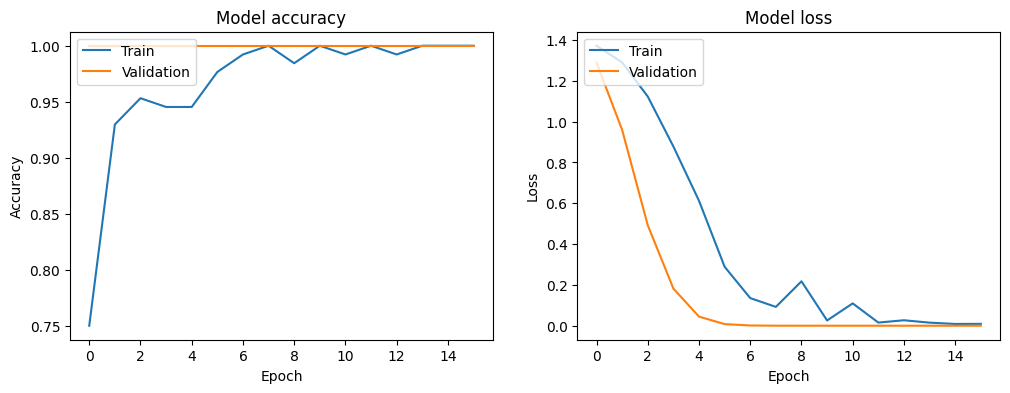

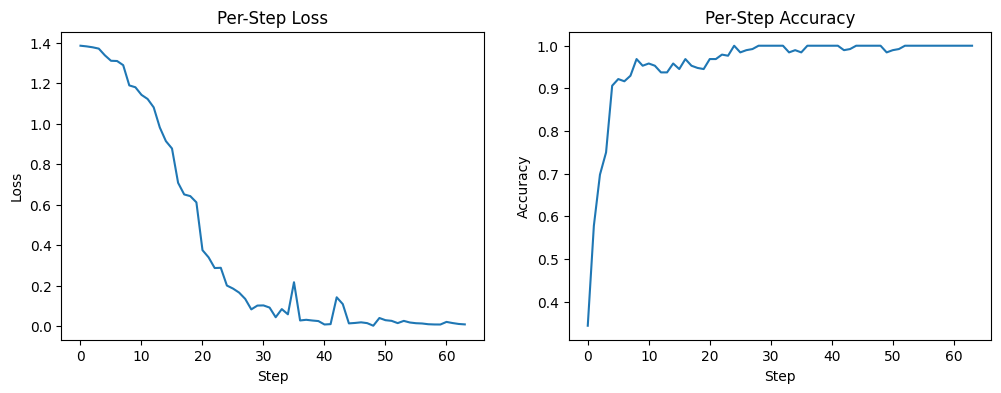

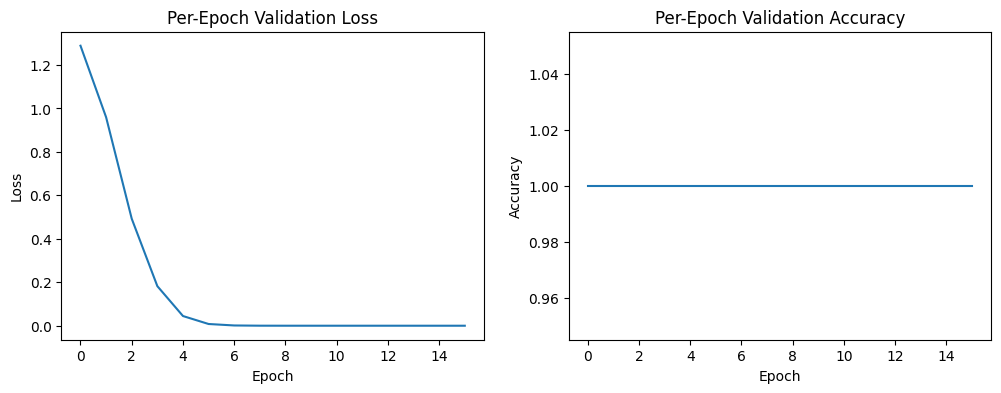

In [8]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join(output_dir, 'Model_acc_val_loss.jpeg'))
plt.show()

# Plot per-step loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(step_history.step_losses)
plt.title('Per-Step Loss')
plt.ylabel('Loss')
plt.xlabel('Step')

# Plot per-step accuracy values
plt.subplot(1, 2, 2)
plt.plot(step_history.step_acc)
plt.title('Per-Step Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Step')

plt.savefig(os.path.join(output_dir, 'step_loss_acc.jpeg'))
plt.show()

# Plot per-step validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(step_history.val_step_losses)
plt.title('Per-Epoch Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')


# Plot per-step validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(step_history.val_step_acc)
plt.title('Per-Epoch Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Save plots
plt.savefig(os.path.join(output_dir, 'epoch_val_ac.jpeg'))
plt.show()

In [32]:
from sklearn.metrics import classification_report

# Assume the following function to get true labels and predictions from the test dataset
def get_true_labels_and_predictions(model, dataset, steps):
    true_labels = []
    predictions = []
    for step, (batch_data, batch_labels) in enumerate(dataset.take(steps)):
        preds = model.predict(batch_data)
        preds = np.argmax(preds, axis=-1).flatten()
        true_labels.extend(batch_labels.numpy().flatten())
        predictions.extend(preds)
    return np.array(true_labels), np.array(predictions)

# Get true labels and predictions from the test dataset
true_labels, predictions = get_true_labels_and_predictions(wavenet_model, test_dataset, test_steps)

# Generate classification report
report = classification_report(true_labels, predictions, output_dict=True)

# Extract the required metrics
metrics_table = {
    'Metric': ['Sensitivity (SEN)', 'Positive Predictive Value (PPV)', 'F1 Score'],
    'WaveNet Model': [
        report['weighted avg']['recall'],  # SEN
        report['weighted avg']['precision'],  # PPV
        report['weighted avg']['f1-score']  # F1
    ]
}

# Print the metrics table
metrics_df = pd.DataFrame(metrics_table)
print(metrics_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
                            Metric  WaveNet Model
0                Sensitivity (SEN)            1.0
1  Positive Predictive Value (PPV)            1.0
2                         F1 Score            1.0


In [9]:
#Test with JOINED DATASET
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
# Define the directories containing your train, validation, and test files
dataset_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project'
output_dir = r'C:\Users\caspe\OneDrive\Documenten\A_Casper\Brein\CS_Ai_Wolfhampton\Deep_machine_learning\CNN_EEG_project\Dataset_Joined\Output'
dir = os.path.join(dataset_dir, 'Dataset_Joined')
start_time = time.time()
output_file = os.path.join(output_dir, 'dataset.h5')
train_files = [os.path.join(output_dir, f'train_label_{label}.h5') for label in labels]
val_files = [os.path.join(output_dir, f'val_label_{label}.h5') for label in labels]
test_files = [os.path.join(output_dir, f'test_label_{label}.h5') for label in labels]


# Calculate total samples for each dataset
total_train_samples = sum(count_samples_model(file) for file in train_files)
total_val_samples = sum(count_samples_model(file) for file in val_files)
total_test_samples = sum(count_samples_model(file) for file in test_files)

# Calculate steps per epoch
steps_per_epoch = int(total_train_samples // batch_size)
validation_steps = int(total_val_samples // batch_size)
test_steps = int(total_test_samples // batch_size)

# Ensure the steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)
test_steps = max(test_steps, 1)

# Define Swish activation function
def swish_activation(x):
    return x * tf.sigmoid(x)

test_loss, test_accuracy = wavenet_model.evaluate(test_dataset, steps=test_steps)
print(f"Test accuracy: {test_accuracy}")
    

6538/6538 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 1.0000 - loss: 1.9578e-04
Test accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
y_true shape: (9,) y_pred shape: (9, 14)
y_true type: <class 'numpy.ndarray'> y_pred type: <class 'numpy.ndarray'>


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets